In [1]:
import numpy as np
import pandas as pd
import datetime

# Pearson Correlation Inference

In [2]:
def pearsonCorr(x, y):
    assert len(x) == len(y)
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    corr = np.dot(x - x_bar, y - y_bar) / (np.sqrt(np.sum((x - x_bar)**2)) * np.sqrt(np.sum((y - y_bar)**2)))
    
    return corr

In [3]:
def runHypothesis(corr, hypothesis):
    print(corr)
    if corr < -.5:
        print("Negatively Correlated")
    elif corr > .5:
        print("Positively Correlated")
    else:
        print("Not Correlated")

    if abs(corr) > 0.5:
        print("Reject Ho:", hypothesis)
    else:
        print("Accept Ho:", hypothesis)

In [4]:
# Perform Tukey's Rule to Remove outliers

def tukey_range(values):
    
    alpha = 1.5
    sorted_values = sorted(values)
    
    # Q1
    q1_index = int(np.ceil(0.25 * len(values)))
    q1 = sorted_values[q1_index]
    
    # Q3
    q3_index = int(np.ceil(0.75 * len(values)))
    q3 = sorted_values[q3_index]
    
    # IQR
    iqr = q3 - q1
    
    return q1 - (alpha * iqr), q3 + (alpha * iqr)

def clean_data(series):
    
    series = series[series >=0]
    lower_limit, upper_limit = tukey_range(series.values)
    print("Lower Range: {}, Upper Range: {}\n".format(lower_limit, upper_limit))
    
    outliers = list(series[series < lower_limit].values) + list(series[series > upper_limit].values)
    print("Total Outliers: {}\n".format(len(outliers)))
    print("Outliers: \n{}\n".format(outliers))
    
    outliers_index = list(series[series < lower_limit].index) + list(series[series > upper_limit].index)
    return series.drop(index = outliers_index)

# Null Hypothesis Ho: 
# COVID-19 cases are not correlated with the number of arrests.

Time Range of First Outbreak - Lockdown in both states

In [5]:
start_date = datetime.date(2020,3,1)
end_date = datetime.date(2020,3,31)

Time Range of one month once the lockdown is lifted 

In [44]:
start_date_1 = datetime.date(2020,7,1)
end_date_1 = datetime.date(2020,7,31)

# Gerogia

Check the trends of arrests and crime incidents during and after lockdown

<AxesSubplot:xlabel='ARREST_DATE'>

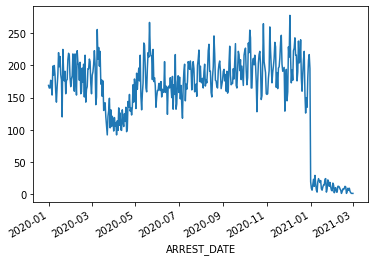

In [14]:
ga_df = pd.read_csv("dataset/GA/NIBRS_ARRESTEE.csv")
ga_df["ARREST_DATE"] = pd.to_datetime(ga_df["ARREST_DATE"])
ga_df["ARREST_COUNT"] = 1
ga_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].plot()

**We see that there is a sharp decline in arrests during March 2020.** 

<AxesSubplot:xlabel='INCIDENT_DATE'>

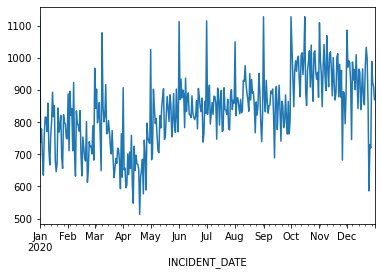

In [64]:
ga_incident = pd.read_csv("dataset/GA/NIBRS_incident.csv")
ga_incident["INCIDENT_DATE"] = pd.to_datetime(ga_incident["INCIDENT_DATE"])
ga_incident["INCIDENT_COUNT"] = 1
ga_incident = ga_incident.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"]
ga_incident.plot()

**There is noticable decline in crime incidents as well during March-April 2020.**

<AxesSubplot:xlabel='submission_date'>

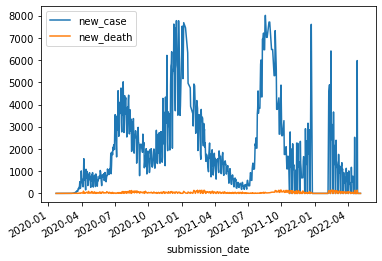

In [15]:
ga_cases = pd.read_csv("georgia_cases_deaths.csv")
ga_cases["submission_date"] = pd.to_datetime(ga_cases["submission_date"])
ga_cases.groupby(by = ["submission_date"]).agg('sum')[["new_case", "new_death"]].plot()

# During Lockdown

In [16]:
s1 = ga_cases.groupby(by = ["submission_date"]).agg('sum')["new_case"].loc[start_date:end_date]
s2 = ga_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].loc[start_date:end_date]
ga_corr = pd.concat([s1,s2], axis = 1).dropna()

#Remove Outliers using Tukey's rule
ga_corr['new_case'] = clean_data(ga_corr['new_case'])
ga_corr['ARREST_COUNT'] = clean_data(ga_corr['ARREST_COUNT'])

ga_corr.dropna(inplace = True)

Lower Range: -305.0, Upper Range: 543.0

Total Outliers: 1

Outliers: 
[1012.0]

Lower Range: 26.5, Upper Range: 302.5

Total Outliers: 0

Outliers: 
[]



In [17]:
corr = pearsonCorr(ga_corr['new_case'].to_numpy(), ga_corr['ARREST_COUNT'].to_numpy())
runHypothesis(corr, "COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in GA state")

-0.6712694907495717
Negatively Correlated
Reject Ho: COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in GA state


# After Lockdown is lifted

In [45]:
s1 = ga_cases.groupby(by = ["submission_date"]).agg('sum')["new_case"].loc[start_date_1:end_date_1]
s2 = ga_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].loc[start_date_1:end_date_1]
ga_corr = pd.concat([s1,s2], axis = 1).dropna()

#Remove Outliers using Tukey's rule
ga_corr['new_case'] = clean_data(ga_corr['new_case'])
ga_corr['ARREST_COUNT'] = clean_data(ga_corr['ARREST_COUNT'])

ga_corr.dropna(inplace = True)

Lower Range: 1178.0, Upper Range: 6066.0

Total Outliers: 0

Outliers: 
[]

Lower Range: 106.0, Upper Range: 258.0

Total Outliers: 0

Outliers: 
[]



In [46]:
corr = pearsonCorr(ga_corr['new_case'].to_numpy(), ga_corr['ARREST_COUNT'].to_numpy())
runHypothesis(corr, "COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in GA state")

0.4252553588572149
Not Correlated
Accept Ho: COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in GA state


# Indiana

<AxesSubplot:xlabel='ARREST_DATE'>

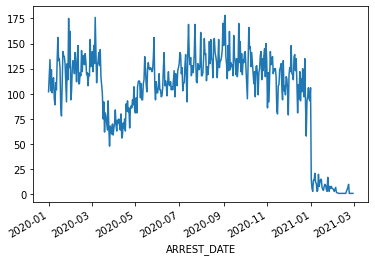

In [33]:
in_df = pd.read_csv("dataset/IN/NIBRS_ARRESTEE.csv")
in_df["ARREST_DATE"] = pd.to_datetime(in_df["ARREST_DATE"])
in_df["ARREST_COUNT"] = 1
in_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].plot()

**There is a sharp decline in arrests during March 2020.**

<AxesSubplot:xlabel='INCIDENT_DATE'>

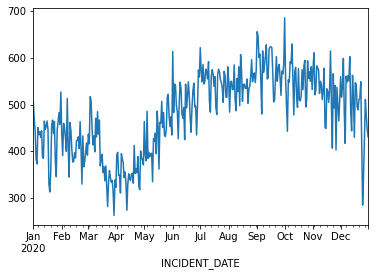

In [56]:
in_incident = pd.read_csv("dataset/IN/NIBRS_incident.csv")
in_incident["INCIDENT_DATE"] = pd.to_datetime(in_incident["INCIDENT_DATE"])
in_incident["INCIDENT_COUNT"] = 1
in_incident.groupby(by = ["INCIDENT_DATE"]).agg('sum')["INCIDENT_COUNT"].plot()

**There is a noticable decline in crime incidents during March-April 2020.**

<AxesSubplot:xlabel='submission_date'>

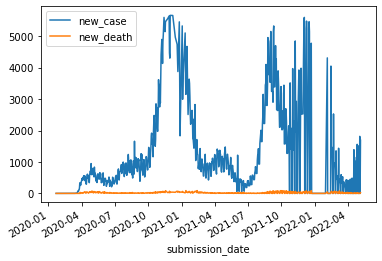

In [34]:
in_cases = pd.read_csv("indiana_cases_deaths.csv")
in_cases["submission_date"] = pd.to_datetime(in_cases["submission_date"])
in_cases.groupby(by = ["submission_date"]).agg('sum')[["new_case", "new_death"]].plot()

# During Lockdown

In [35]:
s1 = in_cases.groupby(by = ["submission_date"]).agg('sum')["new_case"].loc[start_date:end_date]
s2 = in_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].loc[start_date:end_date]
in_corr = pd.concat([s1,s2], axis = 1).dropna()

#Remove Outliers using Tukey's rule
in_corr['new_case'] = clean_data(in_corr['new_case'])
in_corr['ARREST_COUNT'] = clean_data(in_corr['ARREST_COUNT'])

in_corr.dropna(inplace = True)

Lower Range: -165.5, Upper Range: 278.5

Total Outliers: 3

Outliers: 
[336.0, 282.0, 373.0]

Lower Range: -23.0, Upper Range: 225.0

Total Outliers: 0

Outliers: 
[]



In [36]:
corr = pearsonCorr(in_corr['new_case'].to_numpy(), in_corr['ARREST_COUNT'].to_numpy())
runHypothesis(corr, "COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in IN state")

-0.6310159282421549
Negatively Correlated
Reject Ho: COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in IN state


# After Lockdown is lifted

In [47]:
s1 = in_cases.groupby(by = ["submission_date"]).agg('sum')["new_case"].loc[start_date_1:end_date_1]
s2 = in_df.groupby(by = ["ARREST_DATE"]).agg('sum')["ARREST_COUNT"].loc[start_date_1:end_date_1]
in_corr = pd.concat([s1,s2], axis = 1).dropna()

#Remove Outliers using Tukey's rule
in_corr['new_case'] = clean_data(in_corr['new_case'])
in_corr['ARREST_COUNT'] = clean_data(in_corr['ARREST_COUNT'])

in_corr.dropna(inplace = True)

Lower Range: 42.0, Upper Range: 1338.0

Total Outliers: 0

Outliers: 
[]

Lower Range: 91.5, Upper Range: 167.5

Total Outliers: 2

Outliers: 
[169, 169]



In [48]:
corr = pearsonCorr(in_corr['new_case'].to_numpy(), in_corr['ARREST_COUNT'].to_numpy())
runHypothesis(corr, "COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in IN state")

0.2232995139862886
Not Correlated
Accept Ho: COVID-19 Cases in March 2021 are not correlated with March 2021 Arrests in IN state


# Inference
**For both the states, in the month of March, there is a sharp increase in the COVID-19 cases, whereas huge decline in the number of arrests. After running the pearson correlation test, we find that they are indeed negatively correlated and rejects the null hyopthesis. This could be due to inforced lockdown after the first outbreak of COVID-19 cases. Once the lockdown is lifted, we can see that hypothesis is no longer rejected and there is a very weak correlation between cases and arrests.**      

**Why is this inference useful?
After the initial decrease in March 2020, jail populations rebounded but stabilized in July-August 2020. During this time, there was no substantial increase in overall crime. We confirm that by looking at the noticable decline in overall incidents for both the states during March-April 2020.
There are challenges ahead in keeping jail populations low by maintaining lower arrests. The response to COVID-19 has shown that such reforms are possible and can safely reduce the number of persons held in jail but sustaining lower jail populations will require maintaining these reforms in some manner. (https://safetyandjusticechallenge.org/wp-content/uploads/2021/07/The-Impact-of-COVID-19-on-Crime-Arrests-and-Jail-Populations-JFA-Institute.pdf)**